<a href="https://colab.research.google.com/github/park-geun-hyeong/Computer_Vision/blob/main/CH2/Pascal_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tensorflow==1.13.1
! pip install keras==2.2.1

In [ ]:
import tensorflow as tf
import keras 

print(tf.__version__)
print(keras.__version__)

In [ ]:
! git clone https://github.com/chulminkw/DLCV

In [4]:
import os 
os.mkdir('/content/DLCV/data/voc')

- VOC_Datasets Downloads

In [ ]:
! wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
! tar -xvf VOCtrainval_11-May-2012.tar -C/content/DLCV/data/voc

In [6]:
os.listdir('/content/DLCV/data/voc/VOCdevkit/VOC2012')

['ImageSets',
 'SegmentationClass',
 'JPEGImages',
 'Annotations',
 'SegmentationObject']

In [14]:
path = '/content/DLCV/data/voc/VOCdevkit/VOC2012/'
file =sorted(os.listdir(path+'JPEGImages'))
file[:10]

['2007_000027.jpg',
 '2007_000032.jpg',
 '2007_000033.jpg',
 '2007_000039.jpg',
 '2007_000042.jpg',
 '2007_000061.jpg',
 '2007_000063.jpg',
 '2007_000068.jpg',
 '2007_000121.jpg',
 '2007_000123.jpg']

- VOC_Datasets의 jpg파일 중 하나 시각화

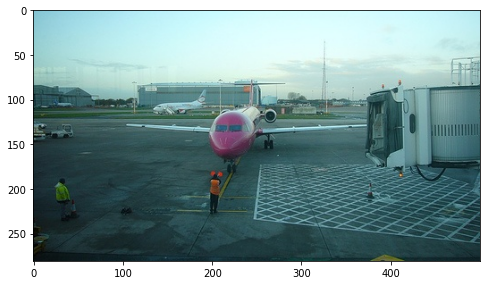

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

img_path = path+'JPEGImages/2007_000032.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

- 시각화 한 jpg_file의 Annotation 확인
- Annotation이란 이미지 속 object의 Bounding Box 위치나 object 이름들을 특정 포맷으로 제공하는 것

In [19]:
!cat /content/DLCV/data/voc/VOCdevkit/VOC2012/Annotations/2007_000032.xml ##Annotation은 xml파일 형식으로 제공된다.

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

- Datasets의 Segmentation 시각화

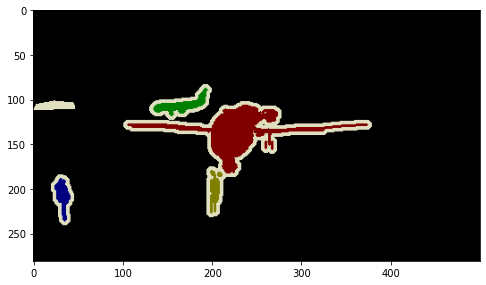

(281, 500, 3)


In [22]:
seg_path = path+'SegmentationObject/2007_000032.png'

seg = cv2.imread(seg_path)
seg = cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(seg)
plt.show()

print(seg.shape)

- Annotation file pharsing  

In [23]:
image_path = os.path.join(path,'JPEGImages')
anno_path = os.path.join(path,'Annotations')

anno_file_list = os.listdir(anno_path)
print(len(anno_file_list))
print(anno_file_list[:5])

17125
['2009_001812.xml', '2011_000257.xml', '2009_002763.xml', '2009_001644.xml', '2011_003488.xml']


In [24]:
import xml.etree.ElementTree as ET ##xml파일을 preprocessing 하는 method

xml_file = os.path.join(anno_path,'2007_000032.xml')

In [25]:
tree = ET.parse(xml_file)
root = tree.getroot() ##xml_file에 대한 정보를 root에 저장

In [29]:
image_name = root.find('filename').text
image_file = os.path.join(image_path,image_name)
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height  = int(image_size.find('height').text)

In [38]:
object_list=[]

for obj in root.findall('object'): ##foot.findall 함수를 통해 모든 object 정보 저장 
    xmlbox=obj.find("bndbox")

    x1 = int(xmlbox.find('xmin').text) ## bounding_box의 좌상단,우하단 좌표 저장
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)

    bndbox_pos=(x1,y1,x2,y2)
    class_name = obj.find('name').text
    obj_dict = {"name":class_name, 'bndbox':bndbox_pos}
    object_list.append(obj_dict)

print("image_full_name: {}, image_size: {}".format(image_file,image_size))

for i in object_list:
    print(i)



image_full_name: /content/DLCV/data/voc/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg, image_size: <Element 'size' at 0x7fddc68bb410>
{'name': 'aeroplane', 'bndbox': (104, 78, 375, 183)}
{'name': 'aeroplane', 'bndbox': (133, 88, 197, 123)}
{'name': 'person', 'bndbox': (195, 180, 213, 229)}
{'name': 'person', 'bndbox': (26, 189, 44, 238)}


- Annotation 정보를 가공해서 실제 jpg 파일에 Bounding_box 시각화 해보기


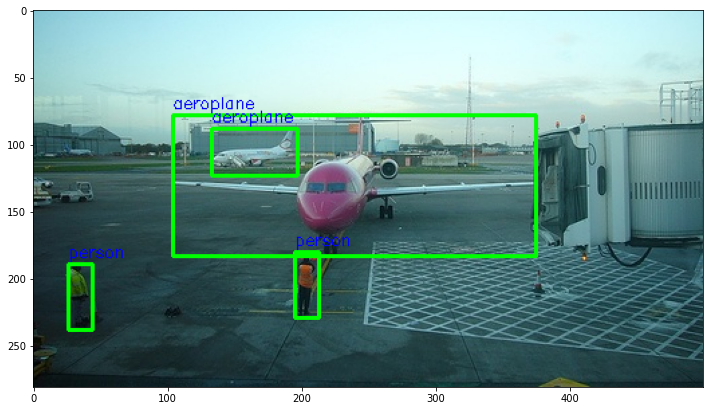

In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import xml.etree.ElementTree as ET
import os

xml_file = os.path.join(anno_path, '2007_000032.xml')
img_file = os.path.join(image_path, '2007_000032.jpg')

img = cv2.imread(img_file)
img_copy = img.copy()

tree = ET.parse(xml_file)
root = tree.getroot()

for obj in root.findall('object'):
    bndbox = obj.find('bndbox')

    left = int(bndbox.find('xmin').text)
    top = int(bndbox.find('ymin').text)
    right = int(bndbox.find('xmax').text)
    bottom = int(bndbox.find('ymax').text)

    bndbox_poss = (left,top,right,bottom)
    class_name = obj.find('name').text

    cv2.rectangle(img_copy,(left,top),(right,bottom),color=(0,255,0),thickness=2)
    cv2.putText(img_copy, class_name, (left,top-5), cv2.FONT_HERSHEY_SIMPLEX,0.4,color=(255,0,0), thickness=1)

img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.show()